## Week14 Advanced Visualizations with Seaborn, Part II

In this week's lesson, we'll continue working our way through the basics of Seaborn. This week we will try to look at some more advanced plotting techniques that allow you to examine multiple variables at once. This week's lesson includes:

* faceted histograms/box plots
* violin plots
* scatterplots
* multivariate time plots
* multivariate kernel density plots

Much like last week, the goal is to give you a quick exposure to these techniques so they are available for your final project while keeping the activity relatively short so most of your time can be spent on capstone project.

In [1]:
# If you have not already, install the pydataset package. 
# This package gives us data sets to work with very easily.
# You will also need the seaborn package.

! pip install pydataset
! pip install seaborn

You should consider upgrading via the '/Users/thernandezcolon/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/thernandezcolon/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


In [17]:
# The convention for importing Seaborn is "sns". 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from pydataset import data

## About the InsectSprays Dataset

> "The counts of insects in agricultural experimental units treated with different insecticides."

[https://www.rdocumentation.org](https://www.rdocumentation.org/packages/datasets/versions/3.6.1/topics/InsectSprays)

In [19]:
df = data("InsectSprays")
df.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


## Question 1

Use Seaborn to create a vertical boxplot of the count of insects that is grouped by the spray type. 

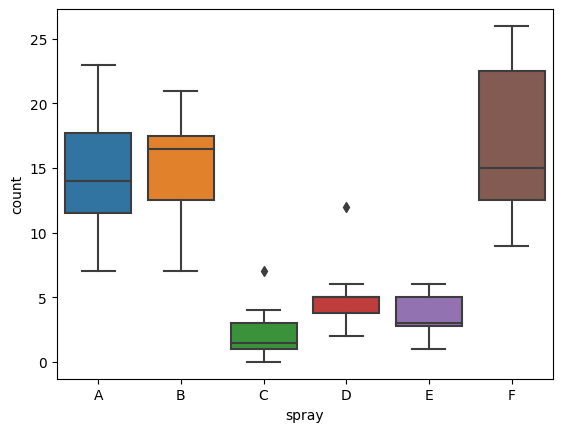

In [20]:
# TODO


sns.boxplot( y=df["count"], x=df["spray"] );


Which types of sprays were more effective?

##### TODO 
F, A, B

## Question 2

Generated the same plot, but using a violin plot. Note the similarities and differences between the two. You should see the same distributions, but with a higher level of fidelity.Which types of sprays were more effective?

<AxesSubplot:xlabel='spray', ylabel='count'>

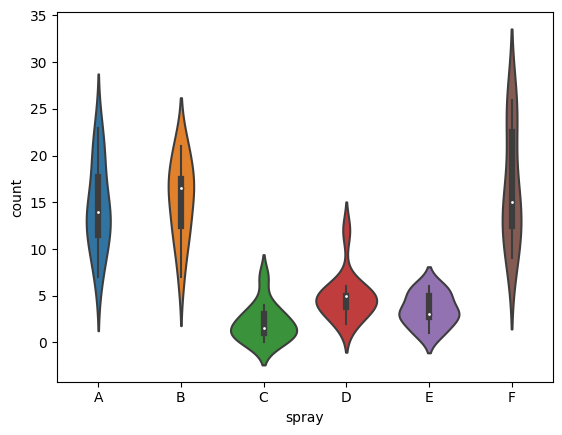

In [21]:
# TODO
sns.violinplot( y=df["count"], x=df["spray"])


In [22]:
# that we can see the A would be the first one because most of the data is in the higher values

## Question 3

Generate the KDE plot below using Seaborn. Again, note the similarities and differences between the other two plots. You should be able to see the same relationships here, but may choose a different plotting style depending on how you want to tell the story.

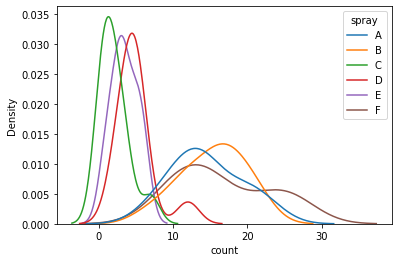

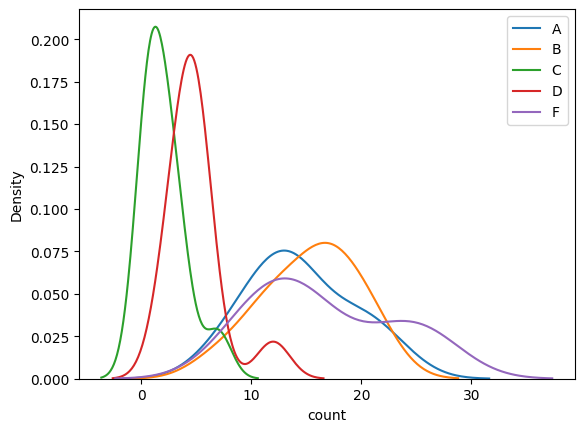

In [23]:
# TODO
sprays = ['A', 'B', 'C', 'D', 'F']
for s in sprays:
    sns.kdeplot(data=df[df.spray == s], x='count')

plt.legend(sprays)

## Question 4

Finally, for one last look at the distribution of these counts by spray type, generate a series of histograms using Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) plotting feature. Use the following design requirements:

* Set the col_wrap argument to 3.
* Set the bin width to 2 so you get a consistent bin for every histogram

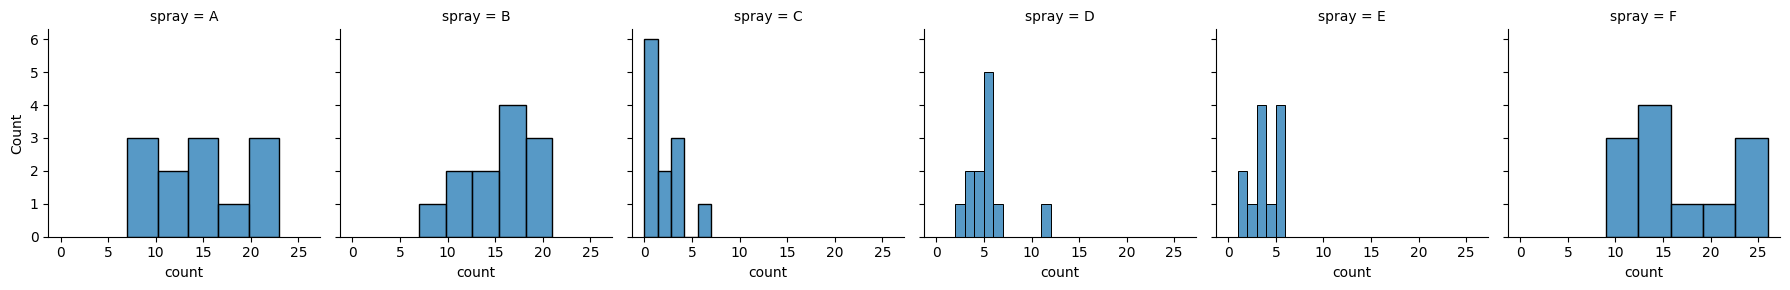

In [28]:
# TODO


g = sns.FacetGrid(df, col="spray")
g.map(sns.histplot, "count")

## About the Bfox Dataset

Format

This data frame contains the following columns:

* partic: Percent of adult women in the workforce.
* tfr: Total fertility rate: expected births to a cohort of 1000 women at current age-specific fertility rates.
* menwage: Men's average weekly wages, in constant 1935 dollars and adjusted for current tax rates.
* womwage: Women's average weekly wages.
* debt: Per-capita consumer debt, in constant dollars.
* parttime: Percent of the active workforce working 34 hours per week or less.

Source: [rdocumentation.org](https://www.rdocumentation.org/packages/carData/versions/3.0-2/topics/Bfox)

In [25]:
dfBfox = data("Bfox")
dfBfox.head()

,partic,tfr,menwage,womwage,debt,parttime
1946,25.3,3748,25.35,14.05,18.18,10.28
1947,24.4,3996,26.14,14.61,28.33,9.28
1948,24.2,3725,25.11,14.23,30.55,9.51
1949,24.2,3750,25.45,14.61,35.81,8.87
1950,23.7,3669,26.79,15.26,38.39,8.54


## Question 5

Practice plotting two variables in time by using a Seaborn lineplot to plot men's and women's wages over time.

<AxesSubplot:>

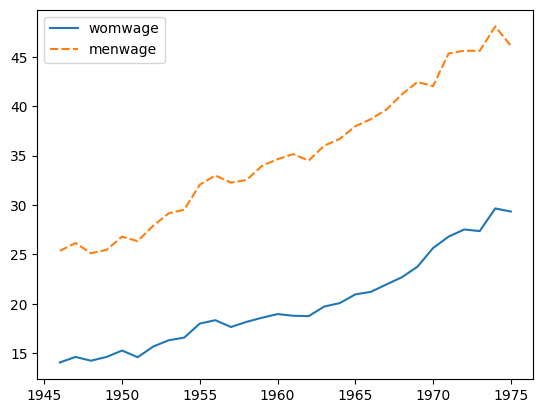

In [42]:
# TODO

sns.lineplot(data=dfBfox[['womwage','menwage']])


Let's say that your capstone project was to predict next year's wages for various employees at some company, let's call it Corporation A. How could you use this visualization to inform your project goal?

##### TODO

From one perspective... we can use this information in a effort to close the gap of equality between genders. We can use this as an opportunity to imform and suggest actions to correct this


From another perspective more business oriented, we can predict how would we expect the wages to keep increasing over time and plan ahead for ways to come up with strategies to make sure we have the money to cover all the employees

## About the NOxEmissions Dataset

A typical medium sized environmental data set with hourly measurements of NOx pollution content in the ambient air.

A data frame with 8088 observations on the following 4 variables.

* julday: day number, a factor with levels 373 ... 730, typically with 24 hourly measurements.
* LNOx: log of hourly mean of NOx concentration in ambient air [ppb] next to a highly frequented motorway.
* LNOxEm: log of hourly sum of NOx emission of cars on this motorway in arbitrary units.
* sqrtWS: Square root of wind speed [m/s].

Source: [https://vincentarelbundock.github.io/Rdatasets/doc/robustbase/NOxEmissions.html](https://vincentarelbundock.github.io/Rdatasets/doc/robustbase/NOxEmissions.html)

In [45]:
dfNOX = data("NOxEmissions")
dfNOX.head()

,julday,LNOx,LNOxEm,sqrtWS
193,373,4.457250,5.536489,0.856446
194,373,4.151827,5.513000,1.016612
195,373,3.834061,4.886994,1.095445
196,373,4.172848,5.138912,1.354068
197,373,4.322807,5.666518,1.204159


## Question 6

Use Seaborn to do a scatterplot of LNOx vs. LNoXEm.

<AxesSubplot:xlabel='LNOx', ylabel='LNOxEm'>

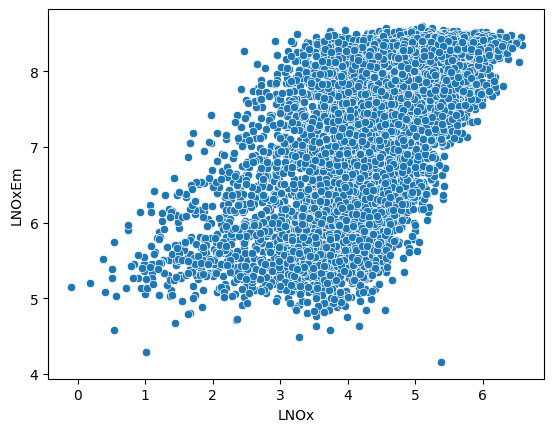

In [47]:
# TODO
sns.scatterplot(data=dfNOX, x="LNOx", y="LNOxEm")



What is the relationship between these two variables?

##### TODO

We can see a positive related linear regression, or a logistic regression as well just based on the shape of the chart

## Question 7

Are there some places where the points are thick relative to others? It's hard to tell. To check that, we'll need to do a [two-dimensional KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Give it a try and see if there are places in the plot above where we have more or less data.

<AxesSubplot:ylabel='Density'>

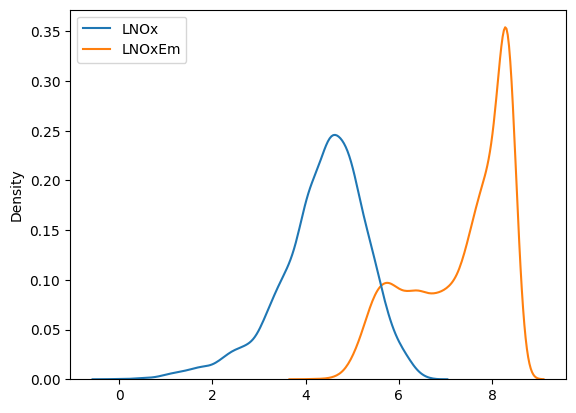

In [48]:
# TODO

sns.kdeplot(data=dfNOX[["LNOx","LNOxEm"]])


Where do we see more data? Less data?
We can see more data between 2 to 8 and less data below 2

##### TODO

Congrats! You've reached the end of the homework assignments for Homegrown. Good luck on your Capstone Project as you finish that up!